In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

# Models from Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

#Saving and loading model
from joblib import dump, load

In [2]:
ssp = pd.read_csv("startup data.csv")
ssp

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [3]:
ssp.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [4]:
#dropping non-labeled and unneeded columns
ssp = ssp.drop(['Unnamed: 0', 'state_code', 'Unnamed: 6', 'latitude','longitude', 'zip_code','state_code.1','object_id'], axis=1 )

In [5]:
ssp

,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,c:65620,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,c:21343,San Francisco,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,c:41747,Burlington,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,...,1,1,0,0,1,0,0,2.6667,1,closed
920,c:31549,Sunnyvale,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,...,0,0,0,0,0,0,1,8.0000,1,closed
921,c:33198,San Francisco,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [6]:
ssp.head()

,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,c:65620,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,...,0,1,1,0,0,0,0,1.0000,1,closed


In [7]:
ssp.columns

Index(['id', 'city', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [8]:
ssp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        923 non-null    object 
 1   city                      923 non-null    object 
 2   name                      923 non-null    object 
 3   labels                    923 non-null    int64  
 4   founded_at                923 non-null    object 
 5   closed_at                 335 non-null    object 
 6   first_funding_at          923 non-null    object 
 7   last_funding_at           923 non-null    object 
 8   age_first_funding_year    923 non-null    float64
 9   age_last_funding_year     923 non-null    float64
 10  age_first_milestone_year  771 non-null    float64
 11  age_last_milestone_year   771 non-null    float64
 12  relationships             923 non-null    int64  
 13  funding_rounds            923 non-null    int64  
 14  funding_to

In [9]:
ssp.shape, len(ssp)

((923, 41), 923)

In [10]:
ssp.isna().sum()

id                            0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

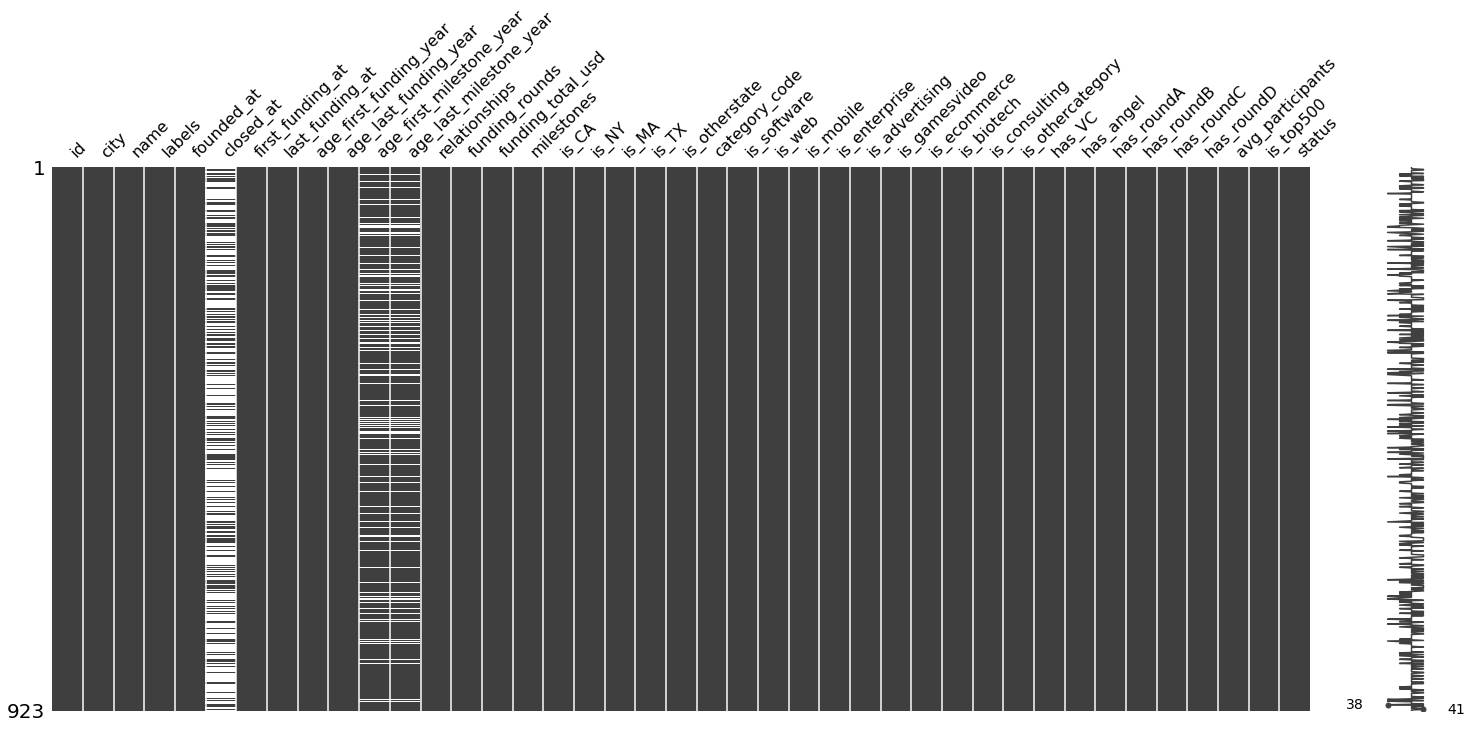

In [11]:
#visualizing null data
missingno.matrix(ssp);

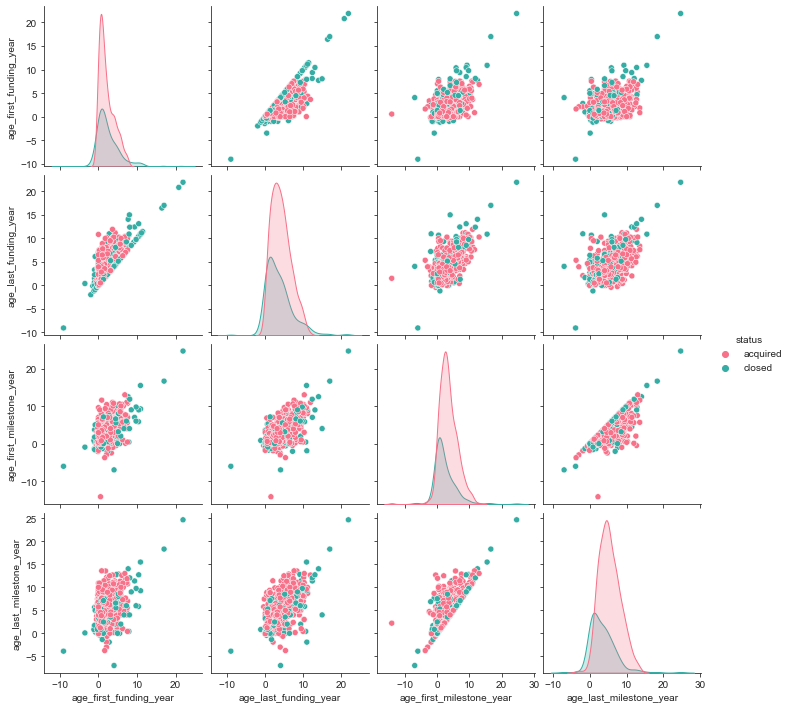

In [12]:
#Visualizing data based on the age of first funding, last funding, first milestone nd last milestone
sns.set_style("ticks")
sns.pairplot(ssp[['first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year',"status"]],hue = "status", diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

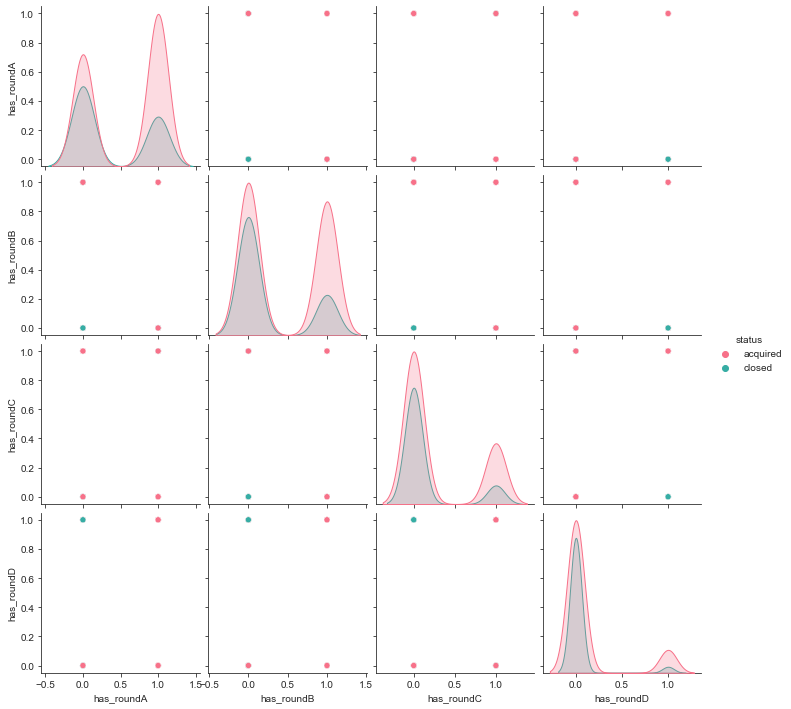

In [13]:
#Visualizing based on startup going through roundA, roundB and roundC funding
sns.set_style("ticks")
sns.pairplot(ssp[['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',"status"]],hue = "status", diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

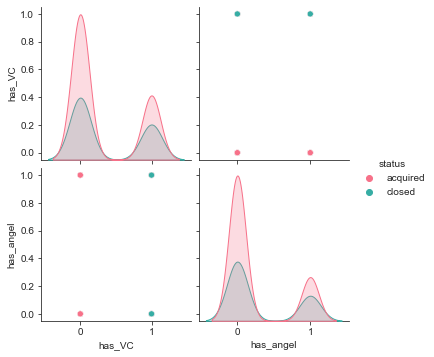

In [14]:
#Visualizing data based on whether startup has vc and angel;
sns.set_style("ticks")
sns.pairplot(ssp[['has_VC',
       'has_angel',"status"]],hue = "status", diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

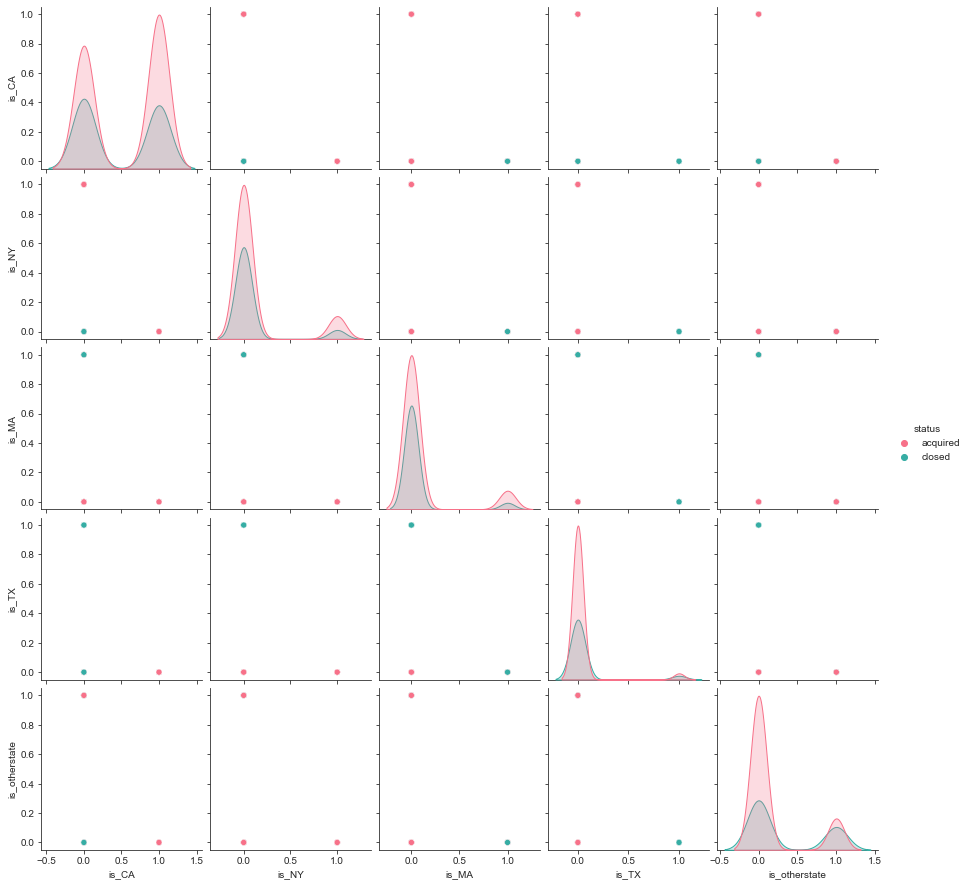

In [15]:
#Visualizing based on Location
sns.set_style("ticks")
sns.pairplot(ssp[['is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate',"status"]],hue = "status", diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

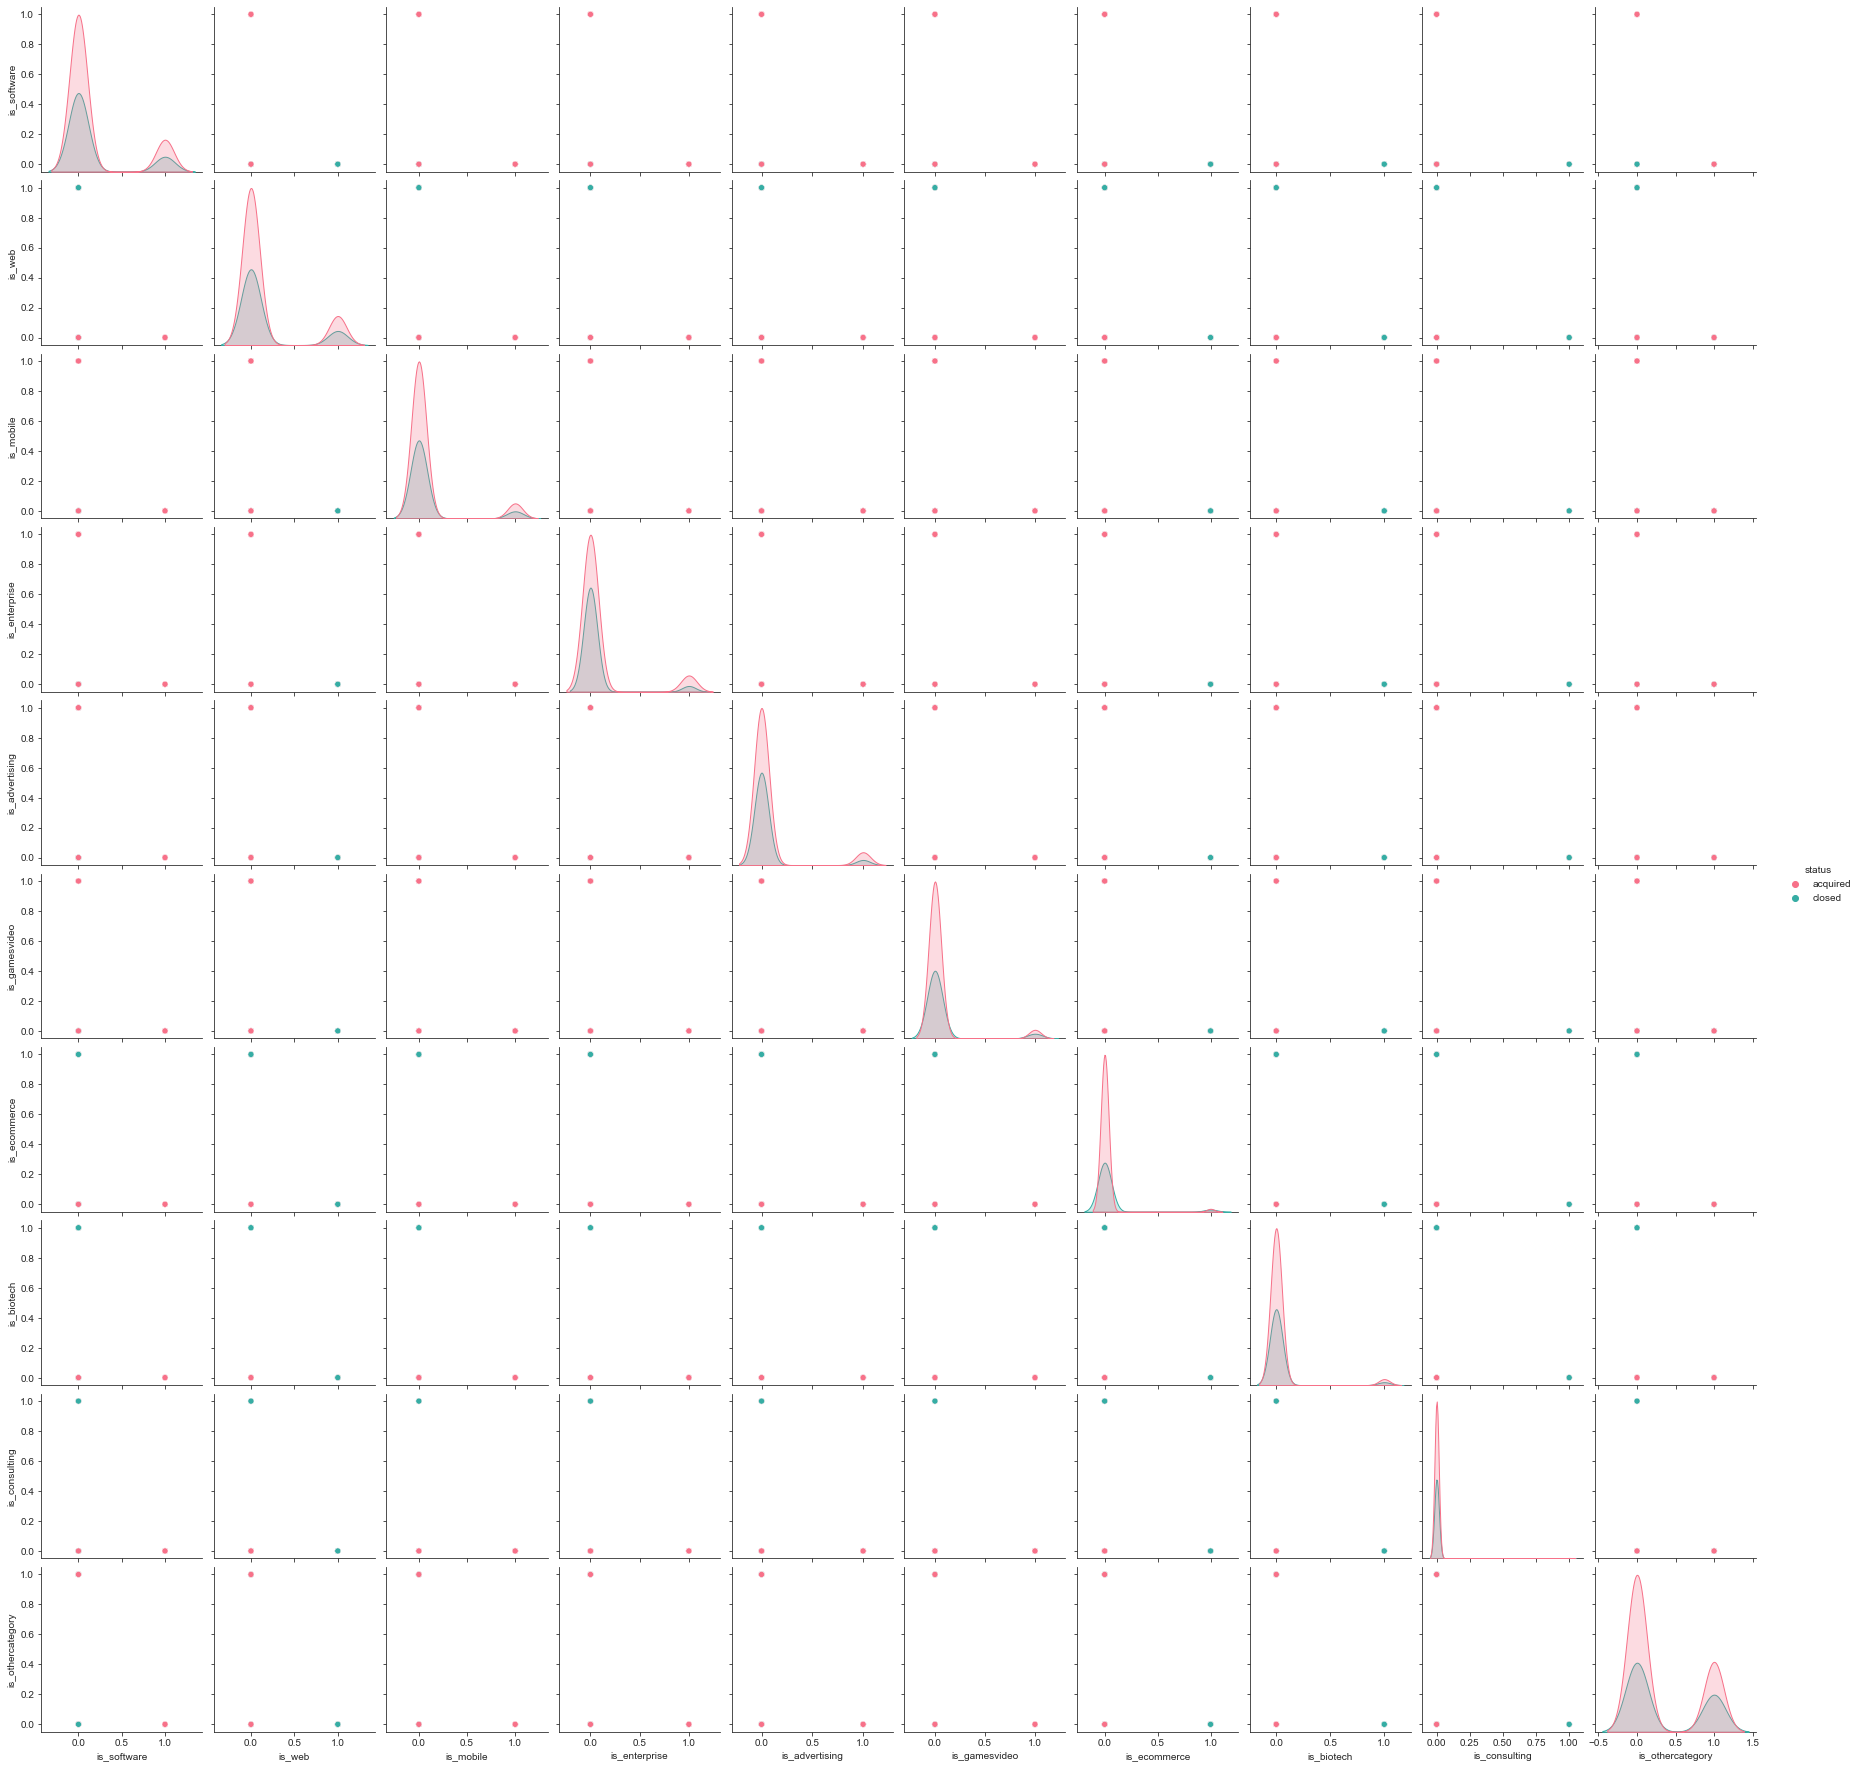

In [16]:
#Visualizing based on product category
sns.set_style("ticks")
sns.pairplot(ssp[['is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory',"status"]],hue = "status", diag_kind = "kde",palette = "husl")
plt.show()


## Machine Learning Model

In [17]:
# Using the transformer pipeline

#filling null data
categorical_features = ['closed_at']
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

numeric_features = ['age_first_milestone_year', 'age_last_milestone_year']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#Convert to non-numerical data to numerical data
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestClassifier())])

# Split data into x and y
x = ssp.drop("status", axis=1)
y = ssp["status"]

In [18]:
#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((738, 40), (185, 40), (738,), (185,))

In [19]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['closed_at']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age_first_milestone_year',
                                                   'age_last_milestone_

In [20]:
model.score(x_train, y_train)

1.0

In [21]:
model.score(x_test, y_test)

0.9891891891891892

In [22]:
y_preds = model.predict(x_test)
y_preds

array(['acquired', 'acquired', 'closed', 'acquired', 'closed', 'acquired',
       'acquired', 'acquired', 'acquired', 'acquired', 'acquired',
       'closed', 'closed', 'closed', 'closed', 'closed', 'acquired',
       'acquired', 'acquired', 'acquired', 'acquired', 'acquired',
       'acquired', 'closed', 'acquired', 'acquired', 'acquired', 'closed',
       'acquired', 'acquired', 'acquired', 'acquired', 'acquired',
       'acquired', 'closed', 'closed', 'closed', 'acquired', 'closed',
       'closed', 'acquired', 'closed', 'closed', 'acquired', 'closed',
       'acquired', 'closed', 'acquired', 'acquired', 'acquired', 'closed',
       'acquired', 'acquired', 'acquired', 'acquired', 'acquired',
       'acquired', 'acquired', 'closed', 'closed', 'acquired', 'closed',
       'closed', 'acquired', 'acquired', 'acquired', 'acquired',
       'acquired', 'closed', 'closed', 'acquired', 'closed', 'closed',
       'acquired', 'acquired', 'acquired', 'acquired', 'acquired',
       'acquired', '

In [23]:
#Evaluating model using confusion matrix
confusion_matrix (y_test, y_preds)

array([[116,   2],
       [  0,  67]], dtype=int64)

In [24]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,acquired,closed
Actual Labels,,
acquired,116,2
closed,0,67


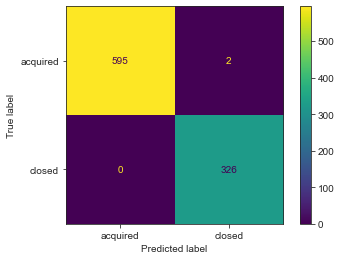

In [25]:
plot_confusion_matrix(model, x, y);

In [26]:
# Classification report of Model
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

    acquired       1.00      0.98      0.99       118
      closed       0.97      1.00      0.99        67

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



In [27]:
# Save model to file
dump(model, filename="ssp_random_forest_model.joblib")

['ssp_random_forest_model.joblib']